# Compile the main simulator code using cython 

In [ ]:
!python setup.py build_ext --inplace

# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import seaborn as sns

In [3]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

2023-08-22 17:59:08,450	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.26.52.164:6379


<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [4]:
#Choose the experiment
experiment_choice = 'stop-signal'
number_of_choices = 1

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

#Define how many simulations to run 
#Each simulation is executed as a separate thread
num_sims = 1
num_cores = 7

#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

in choose pipeline
in reward pipeline
75434668


In [5]:
#Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"

# Running the pipeline

### Define configuration parameter

In [6]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 

configuration = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None,
    'thalamic_threshold': 30.,
    'movement_time': ['mean', 250], #['constant', 300], #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300, #default 1000
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame(['left'], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5]],columns=["left"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [None,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.05, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop 1
    'stop_signal_present': [True,True],
    'stop_signal_probability': [1., 1.],  #[[1,3],[1,2]], #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': [0.6, 0.6], # amplitude of the stop signal over base line
    'stop_signal_onset': [30.,60.], #in ms #antes 200
    'stop_signal_duration' : [200.,200.], 
    'stop_signal_channel': ["all","all"], #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    'stop_signal_population':["STN","GPeA"],
    
    #Stop 2
#     'stop_2_signal_present': True,
#     'stop_2_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
#     'stop_2_signal_amplitude': 0.4, # amplitude of the stop signal over base line
#     'stop_2_signal_onset': 60., #in ms #antes 200
#     'stop_2_signal_duration' : 150.,
#     'stop_2_signal_channel': "all", #"all" (all channels are given the stop signal) 
#                                 #/"any" (channel given the stop signal is chosen randomly)
#                                 # [list of channels] == subset of channels given the stop signal
#     'stop_2_signal_population':["GPeA"],
    
    
    'decision_channel' : 'all', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["stop_input"],
    
    
    #Opto
    'opt_signal_present': [False],
    'opt_signal_probability': [1.], #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': [.7], # ampitude of the stop signal over base line
    'opt_signal_onset': [30.], # in ms
    'opt_signal_duration': [150.],
    'opt_signal_channel': ["all"], # "all" (all channels are given the stop signal) 
    'opt_signal_population':["iSPN"],
}

### Run the simulation

In [7]:
results = cbgt.ExecutionManager(cores=7).run([pl]*num_sims,[configuration]*num_sims)  

SpawnThreadManagers <backend.Pipeline object at 0x7f1e39304100>
(worker pid=None) in choose pipeline
(worker pid=None) in choose pipeline
(worker pid=None) conflict 1.0
(worker pid=None) conflict 1.0
(worker pid=None) sum 1.0
(worker pid=None) n_prob_trials [3]
(worker pid=None) calc_rew        left
(worker pid=None) 0  1.095009
(worker pid=None) 1  0.984864
(worker pid=None) 2  0.989678
(worker pid=None) reward_list        left
(worker pid=None) 0  1.095009
(worker pid=None) 1  0.984864
(worker pid=None) 2  0.989678
(worker pid=None) conflict 1.0
(worker pid=None) conflict 1.0
(worker pid=None) sum 1.0
(worker pid=None) n_prob_trials [3]
(worker pid=None) calc_rew        left
(worker pid=None) 0  1.095009
(worker pid=None) 1  0.984864
(worker pid=None) 2  0.989678
(worker pid=None) reward_list        left
(worker pid=None) 0  1.095009
(worker pid=None) 1  0.984864
(worker pid=None) 2  0.989678
SpawnThreadManagers <backend.Pipeline object at 0x7f1e391e7d30>
SpawnThreadManagers <backend

(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) agent.stop_popids [array([1]), array([3])]
(worker pid=None) agent.stop_popids [array([1]), array([3])]
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) gateFRs [24.88888889]
(worker pid=None) thresholds_crossed []
(worker pid=None) gateFRs [24.88888889]
(worker pid=None) thresholds_crossed []
(worker pid=None) trial_num 0
(worker pid=None)   action
(worker pid=None) 0   left
(worker pid=None) chosen_action: stop
(worker pid=None) trial_num 0
(worker pid=None)   action
(worker pid=None) 0   left
(worker pid=None) chosen_action: stop
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) stop stim started
(worker pid=None) gateFRs [30.22222222]
(worker pid=None) thresholds_crossed [0]
(worker pid=None) gateFRs [30.22222222]
(worker pid=None) thresholds_crossed [0]
(worker pid=None) trial_

### Results

In [8]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_population', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'par', 'popconstruct', 'interface', 'gen_stop', 'gen_stop_2', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim

In [9]:
results[0]['stop_list_trials_list']

[array([0, 2, 1]), array([0, 2, 1])]

In [10]:
results[0]['meaneff_GABA']

,GPi,STN,GPeP,GPeA,dSPN,iSPN,Cx,Th,FSI,CxI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.058`,0.37`,0.9`,0.3`,0.0`,0.0`,0.0`,0.0`,0.2`,0.0`
GPeA,0.0`,0.0`,0.0`,0.3`,0.32`,0.12`,0.0`,0.0`,0.02`,0.0`
dSPN,1.8`,0.0`,0.0`,0.054`,0.28`,0.28`,0.0`,0.0`,0.0`,0.0`
iSPN,0.0`,0.0`,4.07`,0.61`,0.28`,0.28`,0.0`,0.0`,0.0`,0.0`
Cx,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
Th,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
FSI,0.0`,0.0`,0.0`,0.0`,1.25`,1.15`,0.0`,0.0`,2.7`,0.0`
CxI,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,1.05`,0.0`,0.0`,1.075`


In [11]:
results[0]['stop_signal_amplitude']

[0.6, 0.4]

In [12]:
experiment_choice

'stop-signal'

In [13]:
#Extract all the relevant dataframes
firing_rates, rt_dist = plt_help.extract_relevant_frames(results,seed,experiment_choice)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:217: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [14]:
results[0]['popfreqs']

,GPi_left,STN_left,GPeP_left,GPeA_left,dSPN_left,iSPN_left,Cx_left,Th_left,FSI_common,CxI_common,Time (ms)
0,75.555556,24.311111,52.976190,5.701754,4.222222,3.777778,0.000000,5.333333,7.333333,0.985663,0
1,75.111111,24.333333,52.738095,5.701754,4.222222,3.777778,0.000000,5.333333,7.333333,0.985663,1
2,74.000000,24.488889,53.125000,5.877193,4.222222,3.555556,0.000000,4.888889,7.555556,0.896057,2
3,73.333333,24.355556,52.886905,5.877193,4.000000,3.555556,0.000000,5.333333,7.111111,0.896057,3
4,73.333333,24.311111,53.154762,5.789474,4.000000,3.555556,0.000000,5.333333,7.111111,0.806452,4
...,...,...,...,...,...,...,...,...,...,...,...
3402,67.555556,26.000000,51.517857,11.929825,5.333333,6.444444,3.513072,11.333333,8.666667,2.508961,3402
3403,67.555556,25.977778,51.279762,11.929825,5.111111,6.888889,3.349673,11.111111,8.666667,2.419355,3403
3404,68.444444,26.244444,50.922619,12.017544,5.111111,6.888889,3.186275,10.888889,8.666667,2.329749,3404
3405,68.666667,26.266667,51.011905,12.105263,5.111111,7.333333,3.022876,11.333333,8.666667,2.329749,3405


In [15]:
#Firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed
0,0,GPi_left,75.555556,GPi,left,75434668_0
1,1,GPi_left,75.111111,GPi,left,75434668_0
2,2,GPi_left,74.000000,GPi,left,75434668_0
3,3,GPi_left,73.333333,GPi,left,75434668_0
4,4,GPi_left,73.333333,GPi,left,75434668_0
...,...,...,...,...,...,...
34065,3402,CxI_common,2.508961,CxI,common,75434668_0
34066,3403,CxI_common,2.419355,CxI,common,75434668_0
34067,3404,CxI_common,2.329749,CxI,common,75434668_0
34068,3405,CxI_common,2.329749,CxI,common,75434668_0


In [16]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

['left']


In [17]:
recorded_variables['stop_input']#.melt(id_vars='Time(ms)')

,index,value,nuclei,Time(ms),seed
0,0,4.45,STN,0,75434668_0
1,1,4.45,STN,1,75434668_0
2,2,4.45,STN,2,75434668_0
3,3,4.45,STN,3,75434668_0
4,4,4.45,STN,4,75434668_0
...,...,...,...,...,...
6807,3401,2.50,GPeA,3401,75434668_0
6808,3402,2.50,GPeA,3402,75434668_0
6809,3403,2.50,GPeA,3403,75434668_0
6810,3404,2.50,GPeA,3404,75434668_0


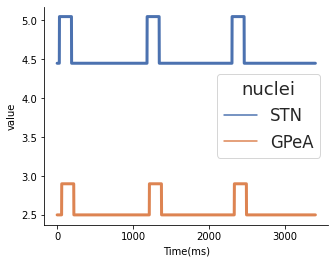

In [18]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
sns.set(style="white", font_scale=1.5)
sns.lineplot(x="Time(ms)",y="value",data=recorded_variables['stop_input'],hue='nuclei',lw=3.0,ax=ax)
# ax.set_ylabel("STN",fontweight='bold')
# ax.legend_.remove()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.tight_layout()
fig.savefig(figure_dir+'stop_input.png')

In [19]:
#Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,stop,0,301,301,555,555,left,0
1,left,1156,1423,267,519,1675,left,1.0
2,left,2276,2553,277,529,2805,left,1.0


In [20]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+str(seed)+'.pickle',['popfreqs','popdata','datatables'])

In [21]:
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_population', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'par', 'popconstruct', 'interface', 'gen_stop', 'gen_stop_2', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim

In [22]:
results[0]['stop_signal_present']

[True, True]

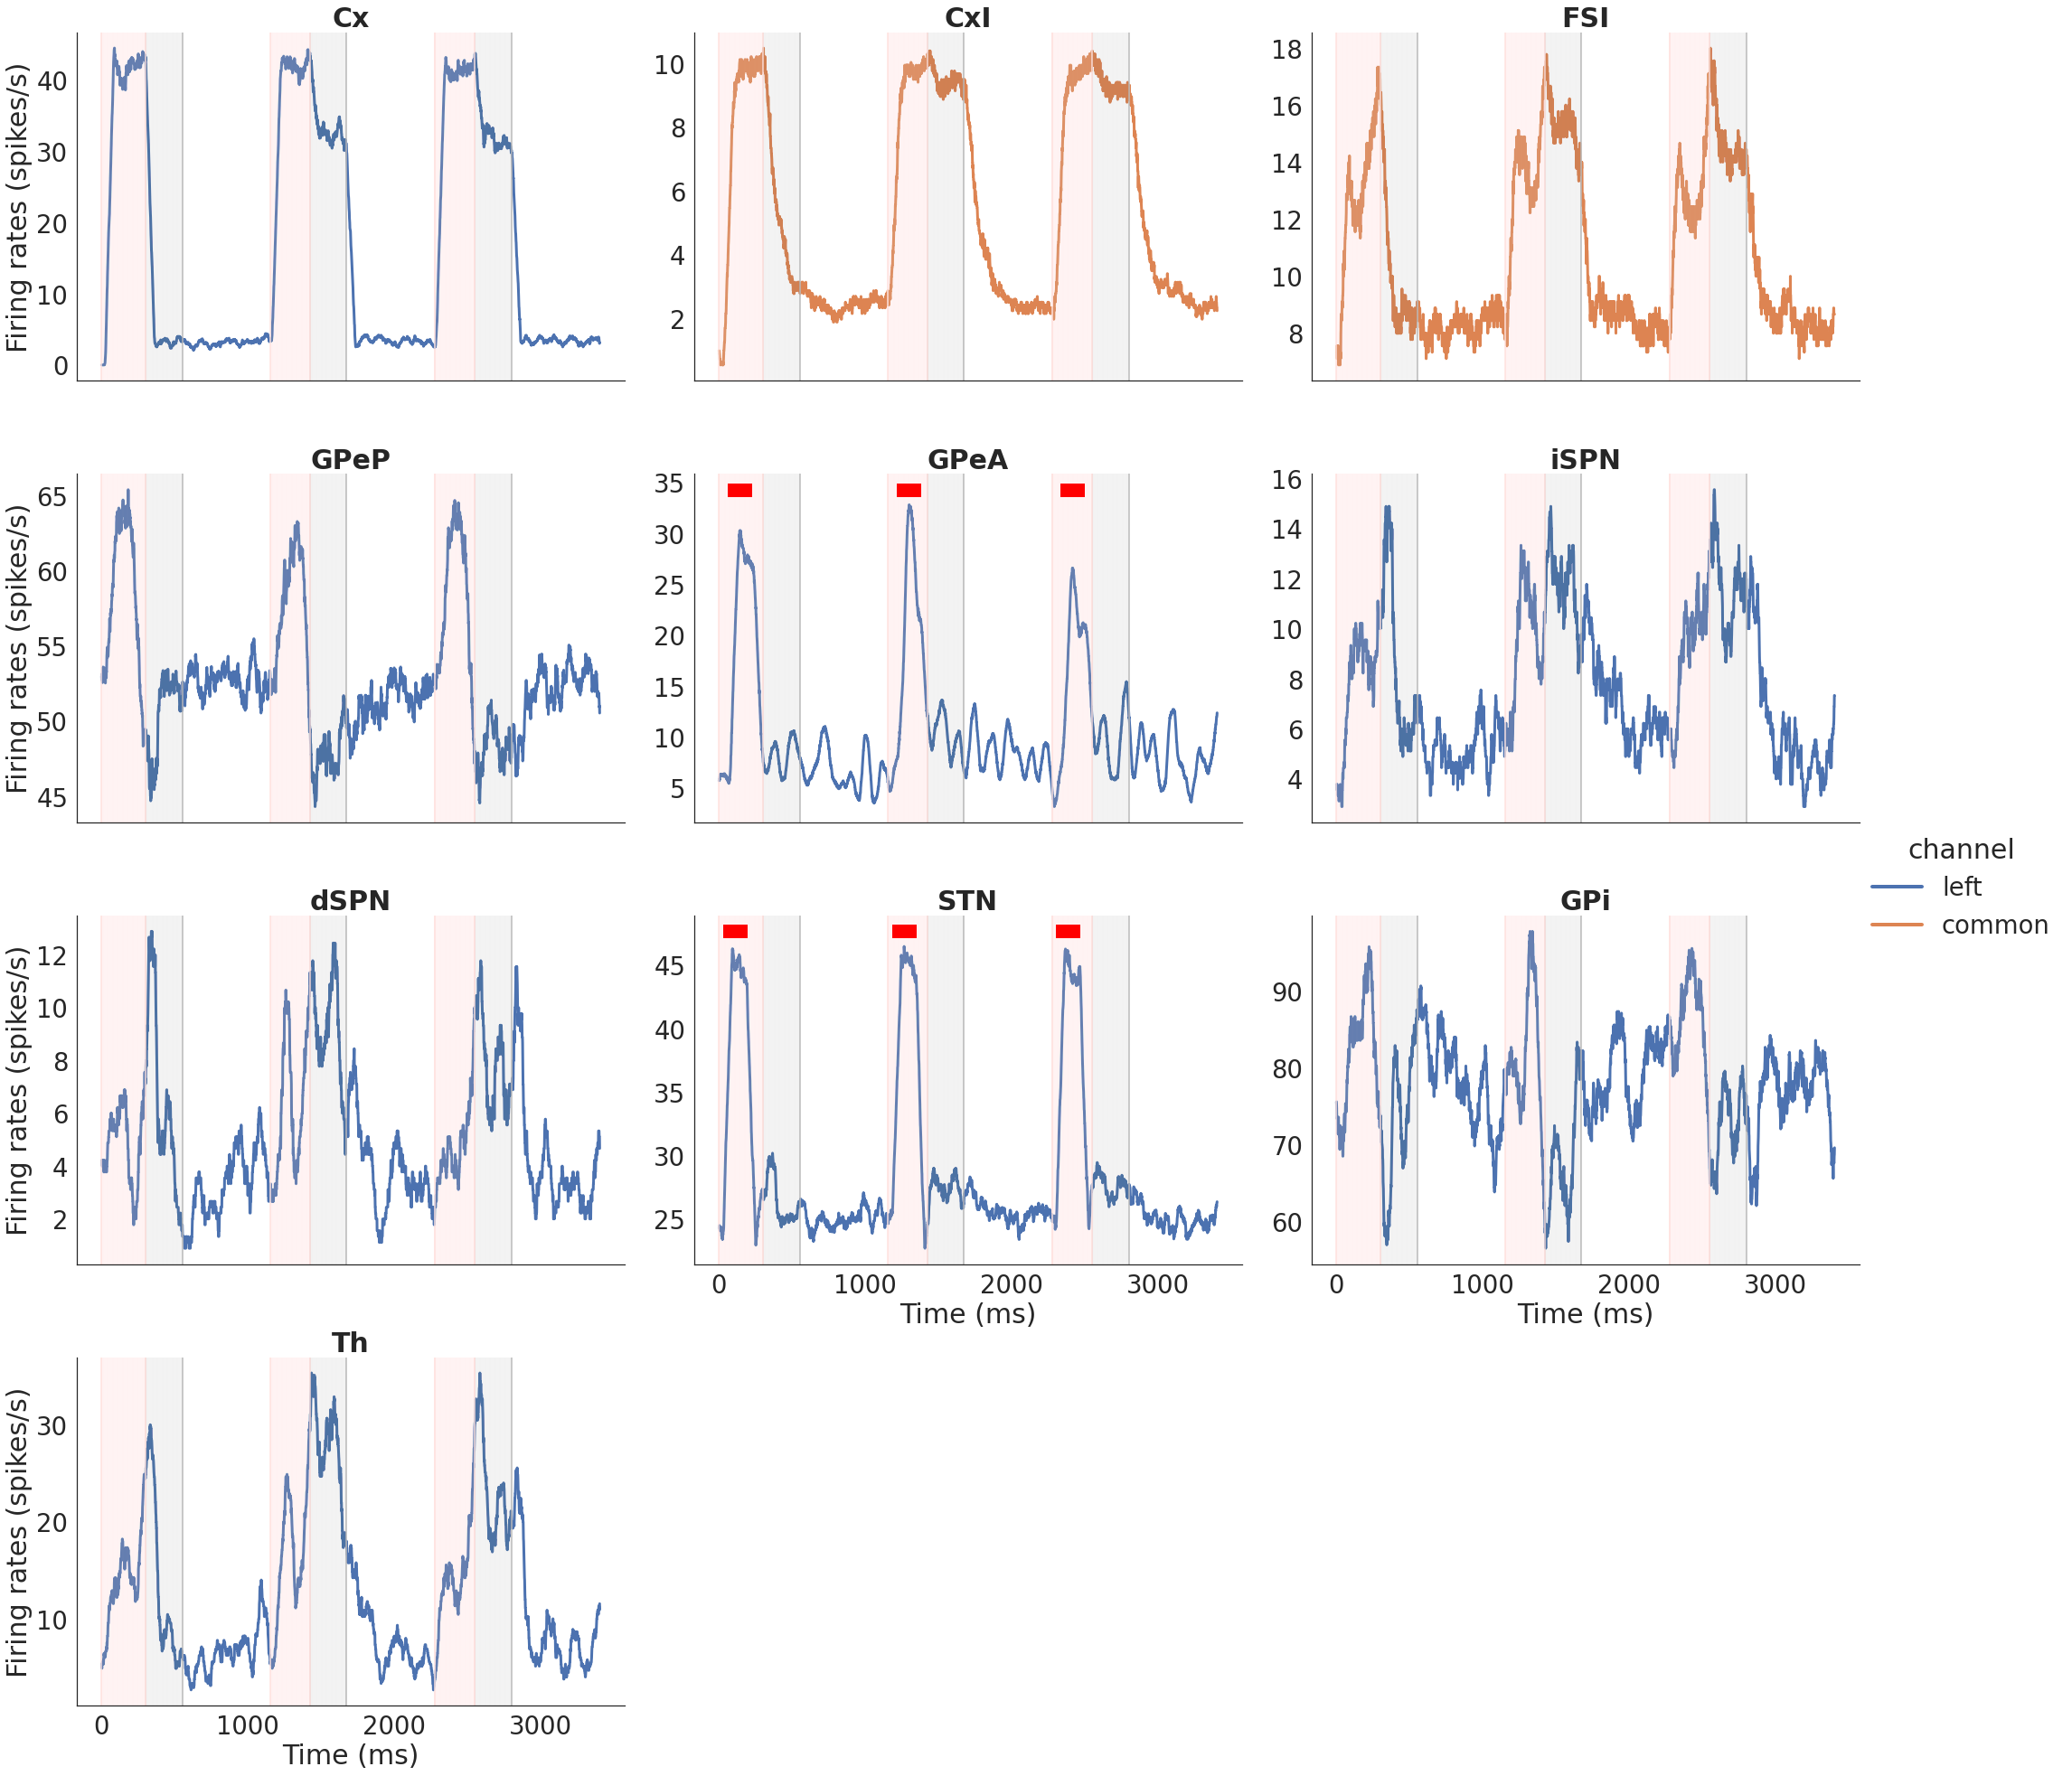

(worker pid=None) in choose pipeline
(worker pid=None) in choose pipeline
(worker pid=None) change points: [0 1 2 2]
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) sum 1.4
(worker pid=None) n_prob_trials [0, 0, 0]
(worker pid=None) calc_rew      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) reward_list      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) sum 1.4
(worker pid=None) n_prob_trials [0, 0, 0]
(worker pid=None) calc_rew      B    C    A
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) reward_list      B    C    A
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) change points: [0 1 2 2]
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) sum 1.4
(worker pid=None) n_prob_trials [0, 0, 0]
(worker pid=None) calc_rew      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) re

(worker pid=None) scaling_conn 0.6666666666666666
(worker pid=None) scaling_wts 1
(worker pid=None) scaling_conn 0.6666666666666666
(worker pid=None) scaling_wts 1
(worker pid=None) q_support None
(worker pid=None) 0    80.0`
(worker pid=None) Name: C_scale, dtype: object
(worker pid=None) q_support None
(worker pid=None) 0    80.0`
(worker pid=None) Name: C_scale, dtype: object


(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) agent.opt_popids [array([ 9, 10, 11]), array([ 9, 10, 11])]
(worker pid=None) agent.opt_popids [array([ 9, 10, 11]), array([ 9, 10, 11])]
(worker pid=None) opt stim started
(worker pid=None) opt stim started
(worker pid=None) phasetimer 94
(worker pid=None) gateFRs [23.77777778 30.88888889 19.55555556]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) phasetimer 94
(worker pid=None) gateFRs [23.77777778 30.88888889 19.55555556]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) trial_num 0
(worker pid=None) chosen_action B
(worker pid=None) scaled dopamine signal 0.0`
(worker pid=None) trial_num 0
(worker pid=None) chosen_action B
(worker pid=None) scaled dopamine signal 0.0`
(worker pid=None) opt stim started
(worker pid=None) opt stim started
(worker pid=None) phasetimer 305
(worker pid=None) gateFRs [25.11111111 30.22222222 20.44444444]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) phasetimer 305
(worker pid=None) gateFRs [25.11111111 

(worker pid=None) scaling_conn 0.6666666666666666
(worker pid=None) scaling_wts 1
(worker pid=None) scaling_conn 0.6666666666666666
(worker pid=None) scaling_wts 1


(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) q_support None
(worker pid=None) 0    80.0`
(worker pid=None) Name: C_scale, dtype: object
(worker pid=None) q_support None
(worker pid=None) 0    80.0`
(worker pid=None) Name: C_scale, dtype: object
(worker pid=None) agent.opt_popids [array([ 9, 10, 11]), array([ 9, 10, 11])]
(worker pid=None) agent.opt_popids [array([ 9, 10, 11]), array([ 9, 10, 11])]
(worker pid=None) opt stim started
(worker pid=None) opt stim started
(worker pid=None) phasetimer 94
(worker pid=None) gateFRs [23.77777778 30.88888889 19.55555556]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) phasetimer 94
(worker pid=None) gateFRs [23.77777778 30.88888889 19.55555556]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) trial_num 0
(worker pid=None) chosen_action B
(worker pid=None) scaled dopamine signal 0.0`
(worker pid=None) trial_num 0
(worker pid=None) chosen_action B
(worker pid=None) scaled dopamine signal 0.0`
(worker pid=None) opt stim started
(worker pid=None) opt stim 

In [23]:
# Plot the firing rates extracted, figure handles are returned in fig_handles
FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,results,experiment_choice,True)
# ax = FR_fig_handles[0].axes[4]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_2_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
# ax = FR_fig_handles[0].axes[7]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_stopsignal.png",dpi=300)

In [ ]:
# FR_fig_handles = plt_func.plot_fr_flex(firing_rates,datatables,['left'],['all'],(1500,2000))
# ax = FR_fig_handles.axes[0]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)

# ax = FR_fig_handles[0].axes[1]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)


In [ ]:
FR_fig_handles